### Def

In [71]:
# импорты и методы из TSL_parser.ipynb

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate, Activation, BatchNormalization, Dropout, Reshape, Dense, CuDNNLSTM, Bidirectional
from tensorflow.keras.layers import MaxPooling1D, Conv1D, Flatten, LocallyConnected1D, AveragePooling1D, LeakyReLU, PReLU
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam, Nadam, Adadelta, RMSprop, Adagrad, Adamax
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

from google.colab import drive
import os

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import register_matplotlib_converters

from sklearn.preprocessing import StandardScaler

!pip install mpl_finance
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc


register_matplotlib_converters()

def rate_history(data, rate):
  with plt.style.context('dark_background'):
    if data.index.year.nunique() == 1: 
     plt.subplots(figsize=(18, 5), facecolor='.1')[1].plot(data[rate])
    else: 
      fig, ax = plt.subplots(nrows=data.index.year.nunique(), ncols=1, figsize=(18, 5 * data.index.year.nunique()), facecolor='.1')
      for i in range(len(ax)):
        ax[i].plot(data[rate].loc[data.index.year == data.index.year.unique()[i]])
  plt.show()


def standart_scale(data):
  scaler = StandardScaler()
  scaler.fit(data)
  return scaler.transform(data), scaler


def resemple_data(data, delta):
  return data.resample(delta).agg({
      column: ['first', 'max', 'min', 'last', 'sum', 'sum'][i] for i, column in enumerate(data.columns)
      })



## свечи

загрузка сконвертированной в общий формат csv (код в файле parse.py)

In [3]:
df = pd.read_csv('https://github.com/timtish/timeseries/raw/master/data/BITSTAMP_SPOT_BTC_USD_1MIN_tslab.candlesticks.csv.gz', index_col=0, parse_dates=[0])
print(df.head())

                     open  high   low  close        vol
ts                                                     
2011-09-13 13:53:00  5.80  6.00  5.80   6.00  25.000000
2011-09-13 14:32:00  5.95  5.95  5.95   5.95  12.452100
2011-09-13 14:35:00  5.88  5.88  5.88   5.88   7.458000
2011-09-13 14:36:00  5.88  5.88  5.88   5.88   0.176882
2011-09-13 14:54:00  5.76  5.76  5.76   5.76   2.267000


построение графика

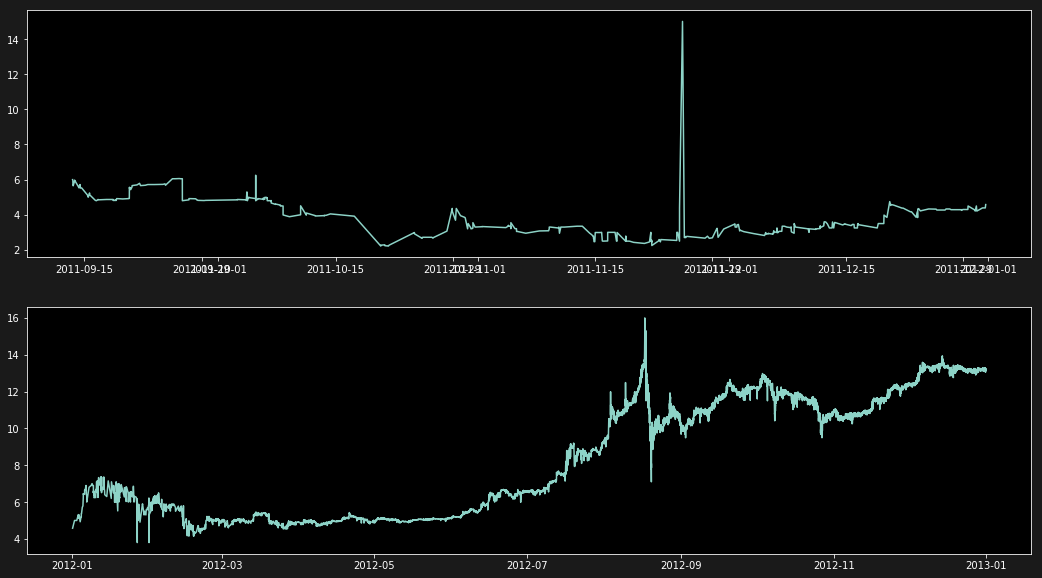

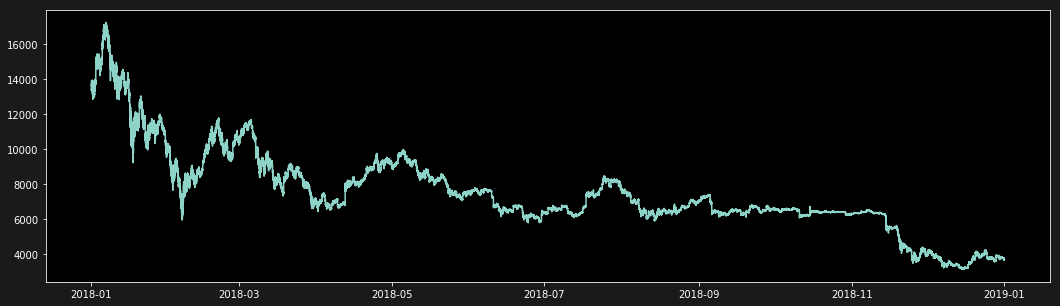

In [41]:
rate_history(df[df.index.year < 2013], 'close')
rate_history(df[df.index.year == 2018], 'open')

укрупнение свечей для тестовых данных "будущего"

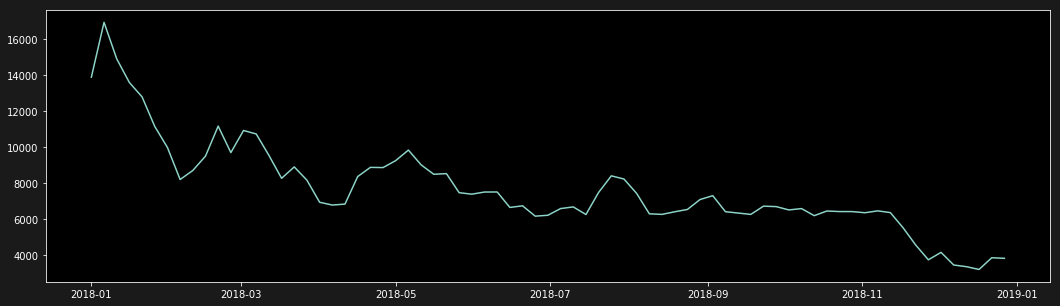

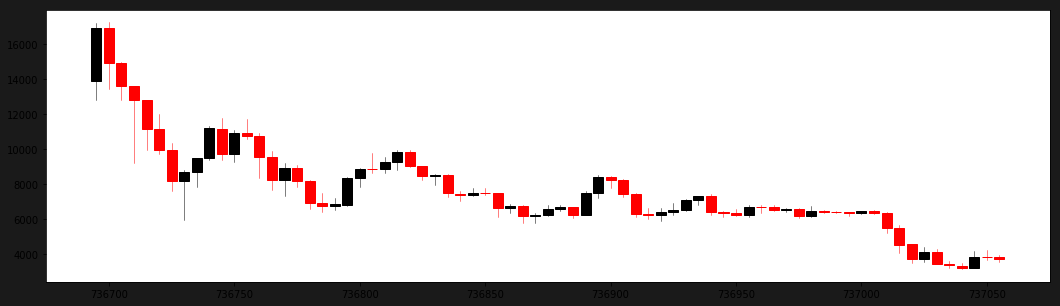

In [73]:
r = resemple_data(df[df.index.year == 2018], '5D')

rate_history(r, 'open')

#with plt.style.context('dark_background'):
fig, ax = plt.subplots(figsize=(18, 5), facecolor='.1')
candlestick_ohlc(ax, zip(mdates.date2num(
    r.index.to_pydatetime()), r['open'], r['high'], r['low'], r['close']), width=4)
plt.show()

## тики